**IMPORTING REQUIRED LIBRARIES**

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


**LOADING THE DATASET**

In [15]:
data = pd.read_csv("/content/train.csv")

**HANDLING MISSING VALUES**

In [16]:
# Handling missing numerical values
numerical_features = data.select_dtypes(include=["float64", "int64"]).columns
imputer = SimpleImputer(strategy="median")
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Handling missing categorical values
categorical_features = data.select_dtypes(include=["object"]).columns
imputer_cat = SimpleImputer(strategy="most_frequent")
data[categorical_features] = imputer_cat.fit_transform(data[categorical_features])

**ENCODING CATEGORICAL FEATURES**

In [17]:
# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

**FEATURE SCALING**

In [18]:
# Standardizing the features
scaler = StandardScaler()
X = data.drop("SalePrice", axis=1)  # "SalePrice"  target variable column name
X_scaled = scaler.fit_transform(X)
y = data["SalePrice"]

**SPLITTING THE DATA**

In [19]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**TRAINING THE LINEAR REGRESSION MODEL**

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

**EVALUATING THE MODEL**

In [21]:
# Making predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

Root Mean Squared Error (RMSE): 35344.20706864401
R-Squared (R2): 0.8371369170530625


**VISUALIZATION: ACTUAL VS. PREDICTED**

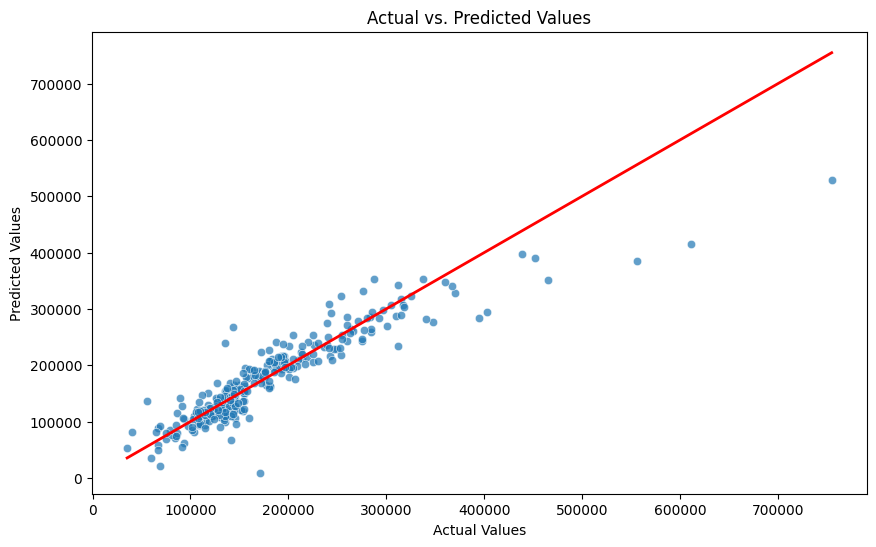

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor="w")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


The formula for Mean Squared Error (MSE) is:


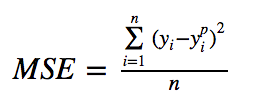

 calculates the mean of squared differences between the actual value and the predicted value

In [23]:
import numpy as np
# Mean Squared Error
def mse( y, y_pred ) :
    return  np.sum( ( y - y_pred ) ** 2 ) / np.size( y )

In [24]:
y_pred = linear_model.predict(X_test)
y_true = y_test

# Now use the loss function
print("MSE Loss:", mse(y_true, y_pred))
rmse = np.sqrt(mse(y_true, y_pred))
print("RMSE Loss:", rmse)



MSE Loss: 1249212973.3111856
RMSE Loss: 35344.20706864401


This tells  that model’s predictions are, on average, ~₹35,344 off from the true price

In [25]:
relative_error = rmse / np.mean(y_true)
print("Relative Error (%):", relative_error * 100)


Relative Error (%): 19.763053172429508


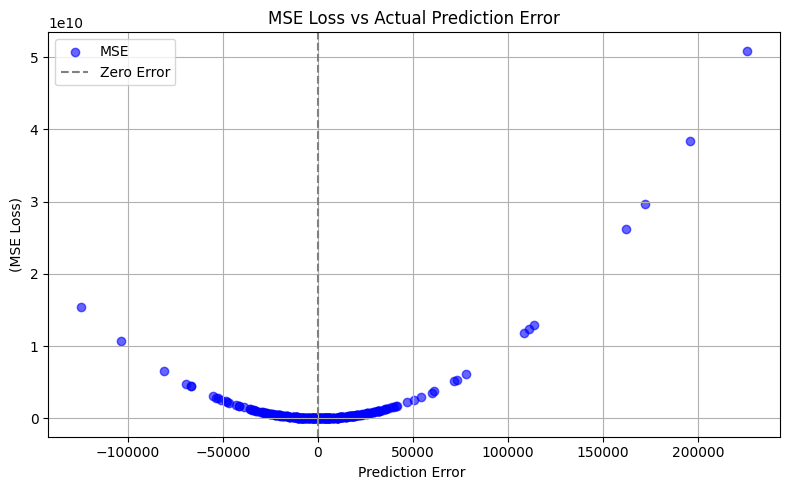

In [45]:
import numpy as np
import matplotlib.pyplot as plt
errors = y_true - y_pred
mse_loss = errors ** 2
plt.figure(figsize=(8, 5))
plt.scatter(errors, mse_loss, color='blue', alpha=0.6, label='MSE')
plt.title('MSE Loss vs Actual Prediction Error')
plt.xlabel('Prediction Error ')
plt.ylabel('(MSE Loss)')
plt.axvline(0, color='gray', linestyle='--', label='Zero Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Outliers show where MSE heavily penalizes large errors (like house price being off by ₹2+ lakhs)





```
# This is formatted as code
```

MAE ( Mean absolute error )
FORMULA

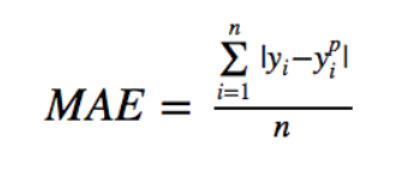

MAE loss calculates the average of absolute differences between the actual value and predicted values, when our data includes outliers we use MAE
The data points that are too large or too small than the mean. By using MAE loss the outliers don’t affect the model.

1)

In [ ]:
error = np.subtract(y_true, y_pred)      # raw errors
abs_error = np.abs(error)                # absolute errors
mae = abs_error.mean()                   # average of absolute errors
print("MAE Loss:", mae)


MAE Loss: 21598.39686759279


2)

In [36]:



#  MAE (Mean Absolute Error
def mae_np(y_pred, y_true):
      mae = np.mean(np.abs(y_pred - y_true))
      return mae

print("MAE Loss:", mae_np(y_pred, y_true))

MAE Loss: 21598.39686759279


On average model's predictions are off by about ₹21,598 from the true house prices.

MSE ≈ 1,249,212,973 → RMSE ≈ √1,249,212,973 ≈ 35,330
So, RMSE > MAE is expected when large errors exist (RMSE squares them).

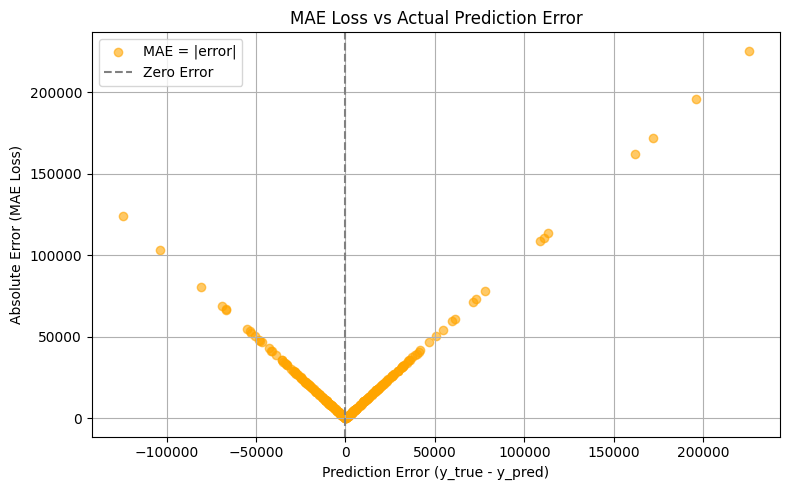

In [37]:
import numpy as np
import matplotlib.pyplot as plt
errors = y_true - y_pred
mae_loss = np.abs(errors)
plt.figure(figsize=(8, 5))
plt.scatter(errors, mae_loss, color='orange', alpha=0.6, label='MAE = |error|')
plt.title('MAE Loss vs Actual Prediction Error')
plt.xlabel('Prediction Error (y_true - y_pred)')
plt.ylabel('Absolute Error (MAE Loss)')
plt.axvline(0, color='gray', linestyle='--', label='Zero Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


X-axis: Each sample in  test set

Y-axis: (error)

Shape: Like MSE but with smaller values (because not squaring them)

In [ ]:
# Sample for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Sklearn MSE:", mean_squared_error(y_true, y_pred))
print("Sklearn MAE:", mean_absolute_error(y_true, y_pred))


Sklearn MSE: 1249212973.3111856
Sklearn MAE: 21598.39686759279


HUBER LOSS

The Huber loss function is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE),

If error < δ	→ behaves like MSE (sensitive)

If error > δ	→ behaves like MAE (robust)



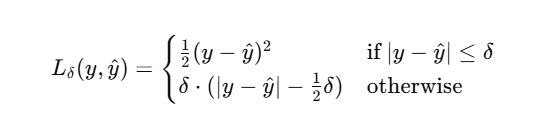

In [ ]:
 def huber_loss(y_true, y_pred, delta=1000):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

print("Huber Loss:", huber_loss(y_true, y_pred))


Huber Loss: 21105146.705240615


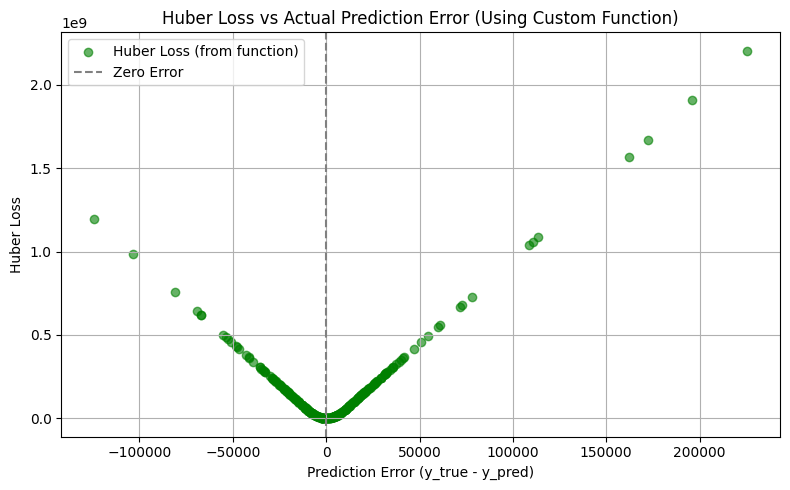

In [43]:
import numpy as np
import matplotlib.pyplot as plt
#  Huber loss function
def huber_loss(y_true, y_pred, delta=10000):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss)
errors = y_true - y_pred
huber_losses = huber_loss(y_true, y_pred, delta=10000)
plt.figure(figsize=(8, 5))
plt.scatter(errors, huber_losses, color='green', alpha=0.6, label='Huber Loss (from function)')
plt.title('Huber Loss vs Actual Prediction Error (Using Custom Function)')
plt.xlabel('Prediction Error (y_true - y_pred)')
plt.ylabel('Huber Loss')
plt.axvline(0, color='gray', linestyle='--', label='Zero Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**SAVING THE MODEL**

In [44]:
import joblib
joblib.dump(linear_model, "linear_regression_model.pkl")
print("Model saved successfully.")

Model saved successfully.
